In [ ]:
# https://github.com/googlecolab/colabtools/issues/5099
!pip install -qq tensorflow[and-cuda]==2.15.0 tf-keras~=2.15.0 tensorrt-libs==8.6.1 --extra-index-url https://pypi.nvidia.com
# Restart session after downloading

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 824.8/824.8 MB 16.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 61.0/61.0 kB 5.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 845.8/845.8 kB 234.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 720.1/720.1 MB 64.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 98.6/98.6 MB 104.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.5/56.5 MB 177.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 124.9/124.9 MB 125.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 195.3/195.3 MB 85.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 20.2/20.2 MB 189.2 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 980.8/980.8 kB 233.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 475.3/475.3 MB 3.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 417.8/417.8 MB 4.8 MB/s et

In [ ]:
# Dataset
!gdown 1O3m1GXyS4OpHk5gkBSCJauRPTcw8y-n_
!unzip -q Celeb-df-V2-faces-extracted.zip

# Model
!gdown 1O-_Pm2xoY6i5qawx6oJZYiSBrc5o5ctO

Downloading...
From (original): https://drive.google.com/uc?id=1O3m1GXyS4OpHk5gkBSCJauRPTcw8y-n_
From (redirected): https://drive.google.com/uc?id=1O3m1GXyS4OpHk5gkBSCJauRPTcw8y-n_&confirm=t&uuid=920b5007-1347-4869-b6a6-975d29620318
To: /content/Celeb-df-V2-faces-extracted.zip
100% 260M/260M [00:02<00:00, 104MB/s]
replace Celeb-df-V2-faces-extracted/test/fake/id0_id1_0000_segment_1.mp4? [y]es, [n]o, [A]ll, [N]one, [r]ename: Downloading...
From (original): https://drive.google.com/uc?id=1O-_Pm2xoY6i5qawx6oJZYiSBrc5o5ctO
From (redirected): https://drive.google.com/uc?id=1O-_Pm2xoY6i5qawx6oJZYiSBrc5o5ctO&confirm=t&uuid=5704e162-133e-4310-8bc6-a21aa2844d80
To: /content/cnn_fully.keras
100% 172M/172M [00:01<00:00, 161MB/s]


In [ ]:
import tensorflow as tf
import os
import cv2
import numpy as np
import shutil
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt

print(tf.__version__)

2.15.0


In [ ]:
model = tf.keras.models.load_model('/content/cnn_fully.keras')
model.summary()

In [ ]:
model.summary()

Model: "model_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_4 (InputLayer)        [(None, 24, 299, 299, 3   0         
                             )]                                  
                                                                 
 time_distributed_1 (TimeDi  (None, 24, 10, 10, 2048   20861480  
 stributed)                  )                                   
                                                                 
 global_average_pooling3d_1  (None, 2048)              0         
  (GlobalAveragePooling3D)                                       
                                                                 
 dense_2 (Dense)             (None, 304)               622896    
                                                                 
 dense_3 (Dense)             (None, 2)                 610       
                                                           

In [ ]:
def read_video(video_path):
    video_frames = []
    cap = cv2.VideoCapture(video_path)
    while True:
        ret, current_frame = cap.read()
        if not ret: break
        current_frame = cv2.resize(current_frame, (299, 299))
        current_frame = cv2.cvtColor(current_frame, cv2.COLOR_BGR2RGB)
        video_frames.append(current_frame)
    cap.release()

    video_frames = np.array([video_frames]) / 255.

    return video_frames


real_videos = os.listdir("/content/Celeb-df-V2-faces-extracted/test/real")
fake_videos = os.listdir("/content/Celeb-df-V2-faces-extracted/test/fake")

real_videos_path = [(os.path.join("/content/Celeb-df-V2-faces-extracted/test/real", video_path), np.array([1., 0.])) for video_path in real_videos]
fake_videos_path = [(os.path.join("/content/Celeb-df-V2-faces-extracted/test/fake", video_path), np.array([0., 1.])) for video_path in fake_videos]

dataset = real_videos_path + fake_videos_path

real = np.argmax(np.array([1.,0.]))
fake = np.argmax(np.array([0.,1.]))

In [ ]:
wrong_videos_path = []

Y_true = []
Y_pred = []

for i, (video_path, label) in enumerate(dataset):
    video = read_video(video_path)
    prediction = model.predict(video, verbose = 0)

    y_true = np.argmax(label)
    y_pred = np.argmax(prediction)
    Y_true.append(y_true)
    Y_pred.append(y_pred)

    if y_pred != y_true:
        wrong_videos_path.append((video_path, prediction))

    if (i+1) % 20 == 0:
        print(f"{i+1}", end = " | ")

total_videos = len(dataset)
wrong = len(wrong_videos_path)
right = total_videos - wrong

print("Total videos:", total_videos)
print("Correct Videos:", right)
print("Wrong videos:", wrong)

20 | 40 | 60 | 80 | 100 | 120 | 140 | 160 | 180 | 200 | 220 | 240 | 260 | 280 | 300 | 320 | 340 | 360 | 380 | 400 | 420 | 440 | 460 | 480 | 500 | Total videos: 518
Correct Videos: 504
Wrong videos: 14


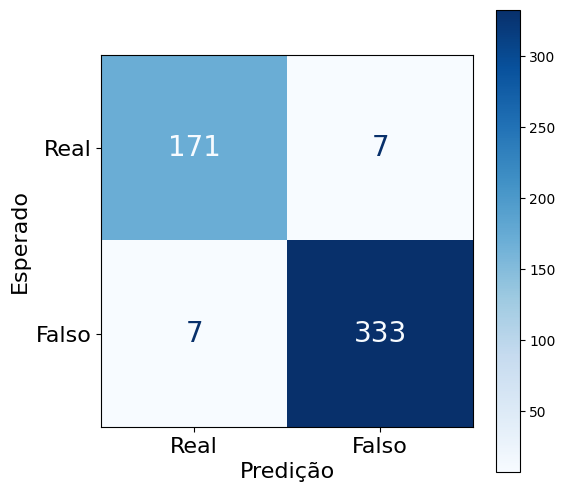

In [ ]:
cm = confusion_matrix(Y_true, Y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=["Real", "Falso"])

# Create the plot
fig, ax = plt.subplots(figsize=(6, 6))
disp.plot(cmap="Blues", ax=ax, values_format='d')  # Integer display

# Update font size for text inside the boxes
for text_obj in disp.text_.ravel():  # Flatten the array before iterating
    text_obj.set_fontsize(20)

# Customize other font sizes
ax.set_xlabel('Predição', fontsize=16)
ax.set_ylabel('Esperado', fontsize=16)
plt.xticks(fontsize=16)
plt.yticks(fontsize=16)

# Save with high quality
plt.savefig("confusion_matrix.pdf", dpi=600, bbox_inches='tight')
plt.show()

In [ ]:
for i in wrong_videos_path:
    print(i)

('/content/Celeb-df-V2-faces-extracted/test/real/00279_segment_1.mp4', array([[0.0058265 , 0.99417347]], dtype=float32))
('/content/Celeb-df-V2-faces-extracted/test/real/id21_0009_segment_1.mp4', array([[0.30721584, 0.69278413]], dtype=float32))
('/content/Celeb-df-V2-faces-extracted/test/real/id31_0007_segment_1.mp4', array([[0.48380166, 0.51619834]], dtype=float32))
('/content/Celeb-df-V2-faces-extracted/test/real/id32_0006_segment_1.mp4', array([[0.06040454, 0.93959546]], dtype=float32))
('/content/Celeb-df-V2-faces-extracted/test/real/id6_0005_segment_1.mp4', array([[0.49716625, 0.5028338 ]], dtype=float32))
('/content/Celeb-df-V2-faces-extracted/test/real/id53_0003_segment_1.mp4', array([[0.0068645 , 0.99313545]], dtype=float32))
('/content/Celeb-df-V2-faces-extracted/test/real/id35_0003_segment_1.mp4', array([[0.04576184, 0.9542381 ]], dtype=float32))
('/content/Celeb-df-V2-faces-extracted/test/fake/id50_id56_0005_segment_1.mp4', array([[0.95362085, 0.04637916]], dtype=float32))


# GradCam


In [ ]:
import math

In [ ]:
def make_gradcam_heatmap(video, model, frame_index, layer_name='time_distributed_1', class_index=None):

    video_batch = tf.expand_dims(video, axis=0)

    grad_model = tf.keras.models.Model(
        [model.inputs],
        [model.get_layer(layer_name).output, model.output]
    )

    with tf.GradientTape() as tape:
        conv_outputs, predictions = grad_model(video_batch)
        if class_index is None:
            class_index = tf.argmax(predictions[0])
        loss = predictions[:, class_index]

    grads = tape.gradient(loss, conv_outputs)[0]
    conv_output_frame = conv_outputs[0][frame_index]
    grads_frame = grads[frame_index]
    weights = tf.reduce_mean(grads_frame, axis=(0, 1))

    cam = np.zeros(conv_output_frame.shape[:2], dtype=np.float32)
    for i, w in enumerate(weights):
        cam += w * conv_output_frame[:, :, i]

    cam = np.maximum(cam, 0)
    cam = cam / (cam.max() + 1e-8)
    cam = cv2.resize(np.array(cam), (video.shape[2], video.shape[1]))

    return cam



def overlay_heatmap_on_frame(frame, heatmap, alpha=0.4):
    plt.imshow(frame)
    plt.imshow(heatmap, alpha=alpha)
    plt.axis("off")
    plt.show()


def single_image_gradcam(video, frame=10):
    video = read_video(video)[0]
    heatmap = make_gradcam_heatmap(video, model, frame)
    frame = video[frame]
    overlay = overlay_heatmap_on_frame(frame, heatmap, alpha=0.5)


def gradcam(videos, frame_index=17):
    fig, axes = plt.subplots(1, 4, figsize=(8, 15))
    axes = axes.flatten()

    for i, path in enumerate(videos):
        video = read_video(path[0])[0]
        heatmap = make_gradcam_heatmap(video, model, frame_index)
        frame = video[frame_index]

        axes[i].imshow(frame)
        axes[i].imshow(heatmap, alpha=0.5, cmap='jet')
        axes[i].axis("off")
        axes[i].set_title(path[1])

    # Hide unused subplots if fewer than 4 videos
    for j in range(i + 1, 4):
        axes[j].axis("off")

    plt.tight_layout()
    plt.savefig(f"gradcam_frame_{frame_index}.png")
    plt.show()


videos = [
    ("/content/Celeb-df-V2-faces-extracted/test/real/id13_0004_segment_1.mp4", "True Positive"),
    ("/content/Celeb-df-V2-faces-extracted/test/real/id6_0005_segment_1.mp4", "False Negative"),
    ("/content/Celeb-df-V2-faces-extracted/test/fake/id0_id1_0005_segment_1.mp4", "False Positive"),
    ("/content/Celeb-df-V2-faces-extracted/test/fake/id10_id11_0001_segment_1.mp4", "True Negative"),
]

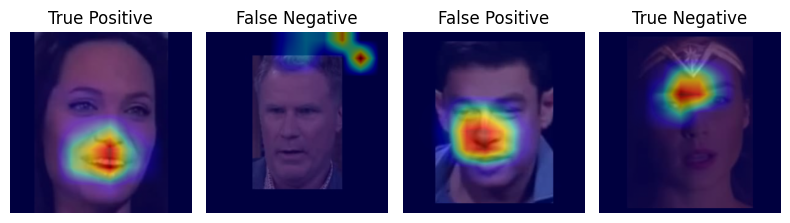

In [ ]:
gradcam(videos, frame_index=0)

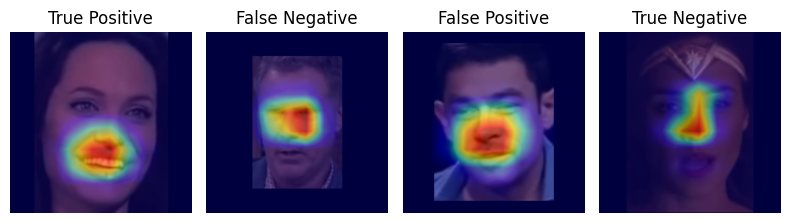

In [ ]:
gradcam(videos, frame_index=11)

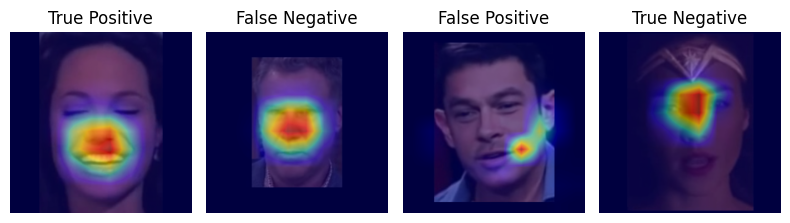

In [ ]:
gradcam(videos, frame_index=23)

# Predição

In [ ]:
labels = {0: "Real", 1: "Falso"}

In [ ]:
video = read_video("/content/real.mp4")
prediction = model.predict(video, verbose = 0)
print(prediction)
print(f"O vídeo foi classificado como: {labels[np.argmax(prediction[0])]}")

[[9.9999928e-01 7.4612086e-07]]
O vídeo foi classificado como: Real


In [ ]:
video = read_video("/content/falso.mp4")
prediction = model.predict(video, verbose = 0)
print(f"O vídeo foi classificado como: {labels[np.argmax(prediction[0])]}")

O vídeo foi classificado como: Falso
